In [8]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/processed/clean_data_model_output.csv')

C:\Users\USVV724227\AppData\Local\Temp\ipykernel_44348\2059972311.py:1: DtypeWarning: Columns (1,9,20,22,23,29,30,45,49,51,53,55,56,59,74,81,82,85,91,97,99,110,111,112,115,124,125,128,135,151,152,157,166,168,169,171) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/clean_data_model_output.csv')


In [5]:
df.shape

(9614, 230)

In [6]:
#Non Synthetic Data
df = df[df['record_type_synthetic'] == False]
df.shape

(5252, 230)

In [ ]:
sas_data = df[df['is_self_administered'] == True]
intercept_data = df[df['is_self_administered'] == False]
sas_data.shape, intercept_data.shape

((545, 230), (4707, 230))

In [26]:
def compare_distributions(sas_data, intercept_data, field):
    if sas_data[field].dtype in ['int64', 'float64']:
        # Numeric field - use histograms
        plt.figure(figsize=(10, 5))
        sns.histplot(sas_data[field], label='Self-Administered', kde=True, color='blue', alpha=0.5, bins=30)
        sns.histplot(intercept_data[field], label='Intercept', kde=True, color='red', alpha=0.5, bins=30)
        plt.legend()
        plt.title(f'Distribution of {field}')
        plt.xlabel(field)
        plt.ylabel('Frequency')
        plt.show()
    else:
        # Categorical field - side-by-side bar plots with labels
        plt.figure(figsize=(12, 6))
        sas_counts = sas_data[field].value_counts(normalize=True) * 100  # Convert to percentages
        intercept_counts = intercept_data[field].value_counts(normalize=True) * 100  # Convert to percentages
        
        compare_df = pd.DataFrame({'Self-Administered': sas_counts, 'Intercept': intercept_counts}).fillna(0)
        ax = compare_df.plot(kind='bar', figsize=(12, 6))
        
        # Add value labels on bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.1f}%', 
                        (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom', fontsize=10)
        
        plt.title(f'Comparison of {field} Distribution')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()


<Figure size 1200x600 with 0 Axes>

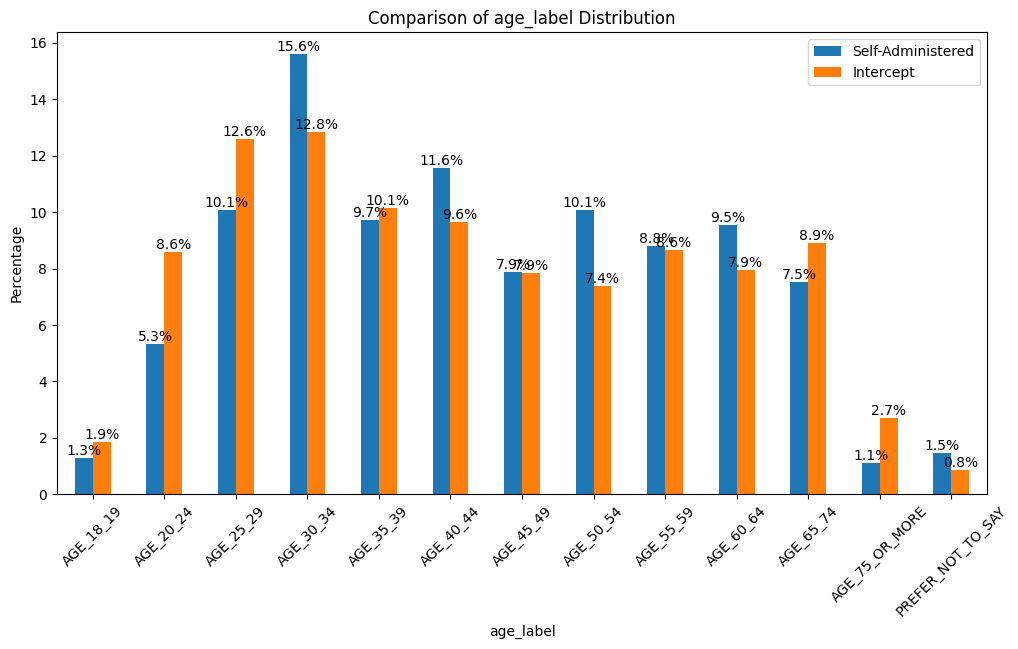

In [27]:
compare_distributions(sas_data, intercept_data, 'age_label')

<Figure size 1200x600 with 0 Axes>

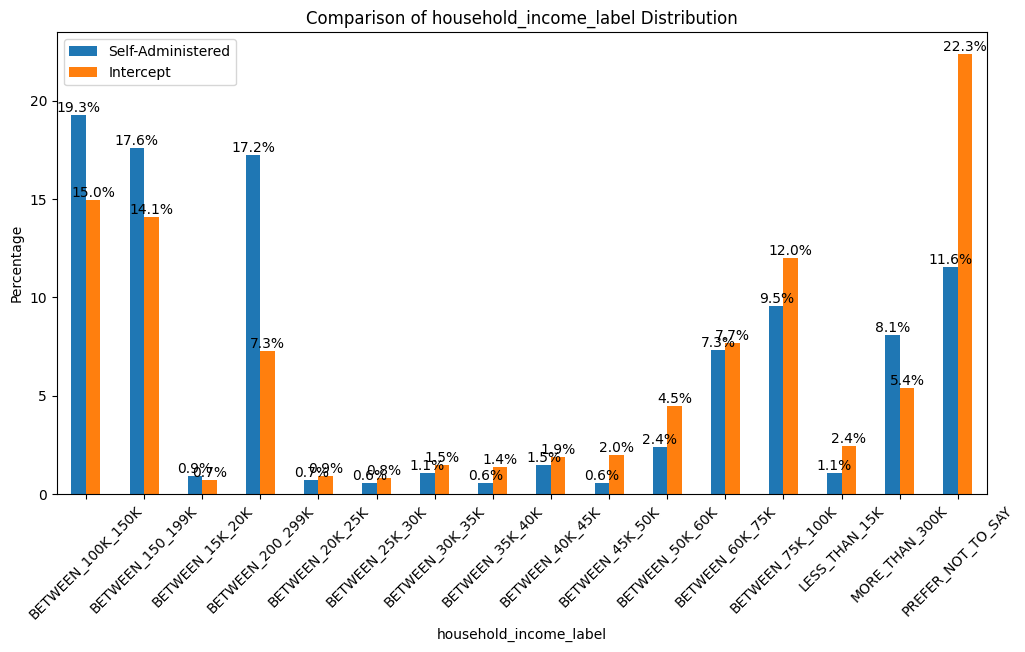

In [28]:
compare_distributions(sas_data, intercept_data, 'household_income_label')

In [43]:
sas_data['marketsegment_label'].value_counts()

marketsegment_label
PASSENGER    307
EMPLOYEE     238
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

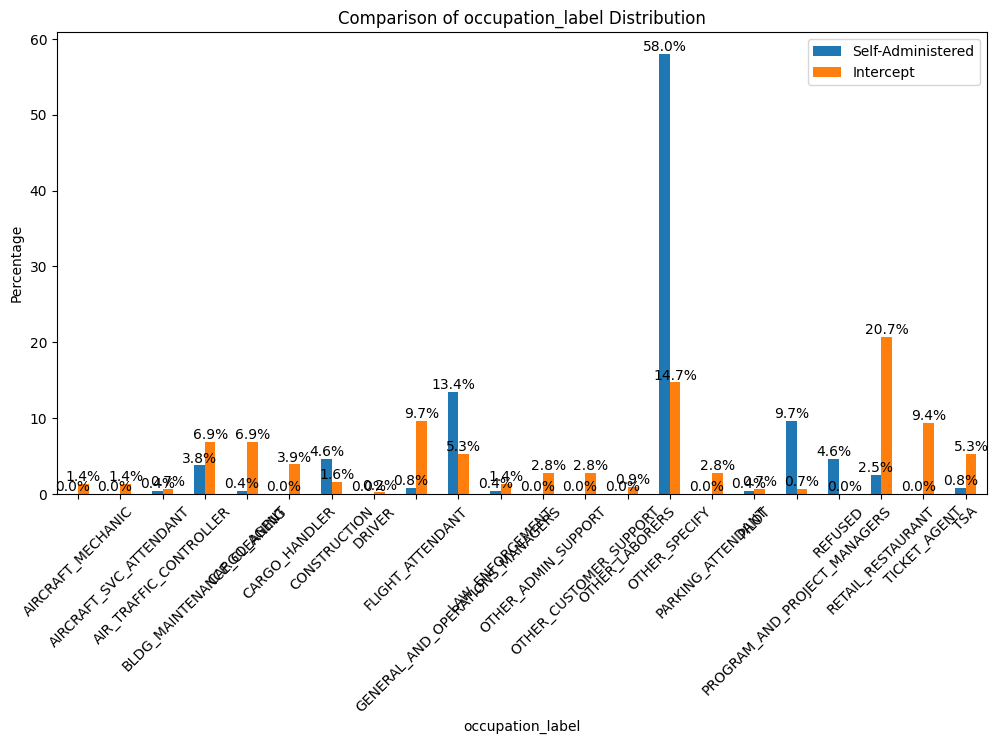

In [29]:
compare_distributions(sas_data, intercept_data, 'occupation_label')

<Figure size 1200x600 with 0 Axes>

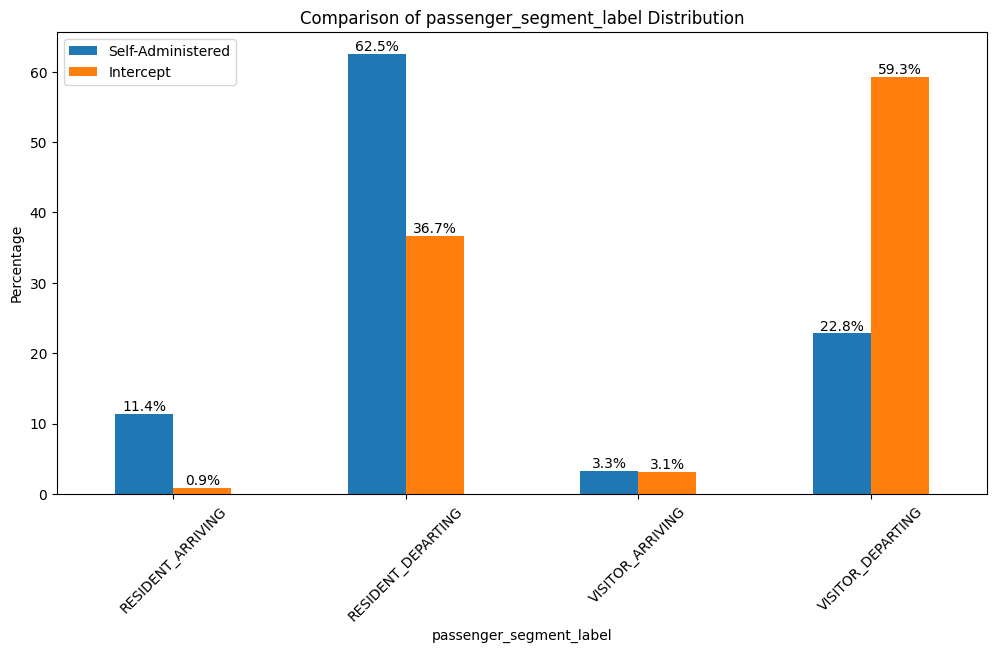

In [42]:
compare_distributions(sas_data[sas_data['marketsegment_label']=='PASSENGER'], intercept_data[intercept_data['marketsegment_label']=='PASSENGER'], 'passenger_segment_label')

<Figure size 1200x600 with 0 Axes>

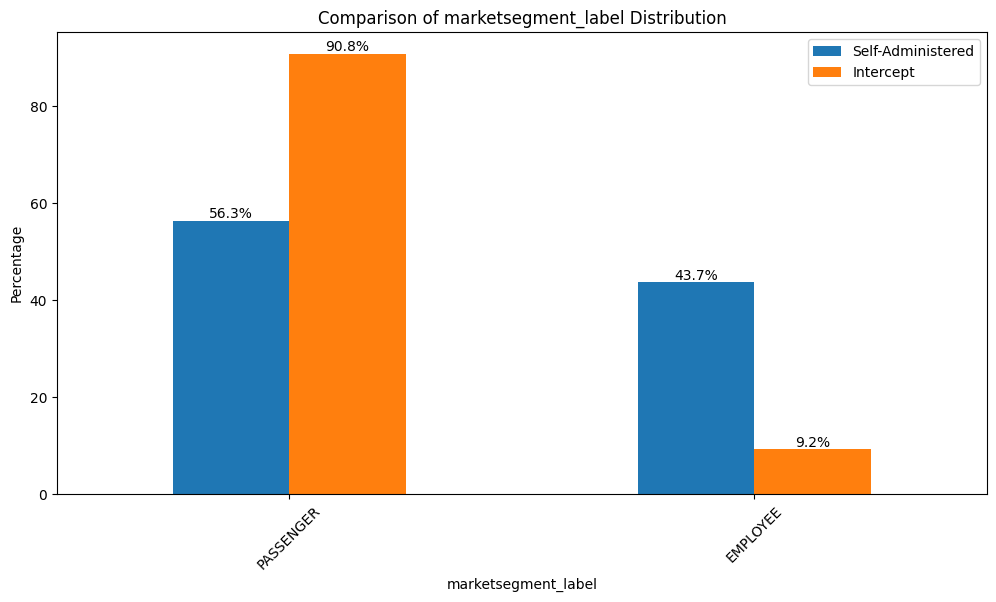

In [31]:
compare_distributions(sas_data, intercept_data, 'marketsegment_label')

<Figure size 1200x600 with 0 Axes>

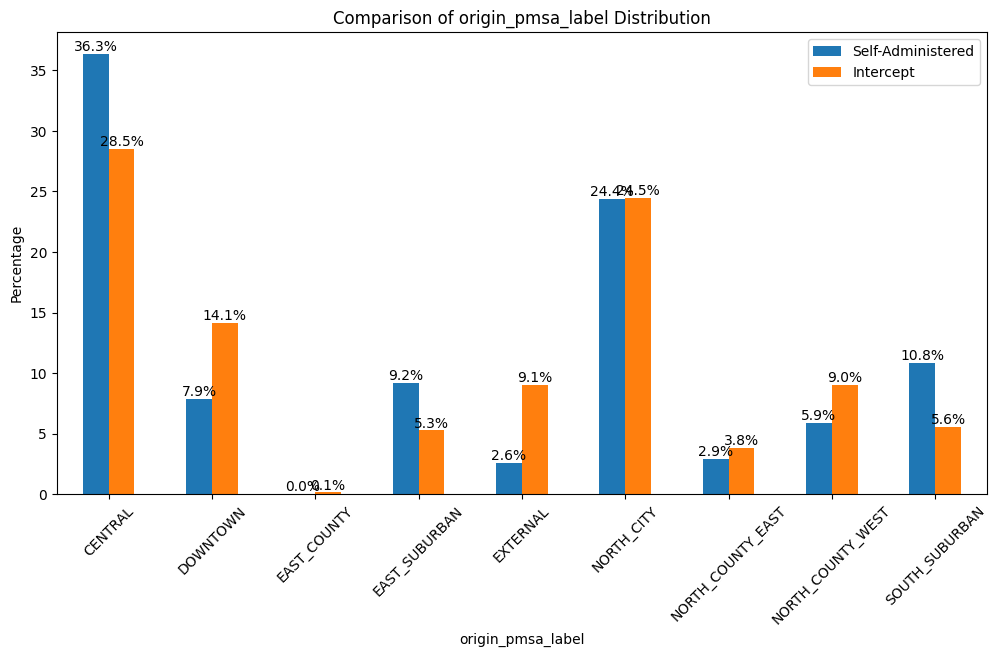

In [33]:
compare_distributions(sas_data, intercept_data, 'origin_pmsa_label')

<Figure size 1200x600 with 0 Axes>

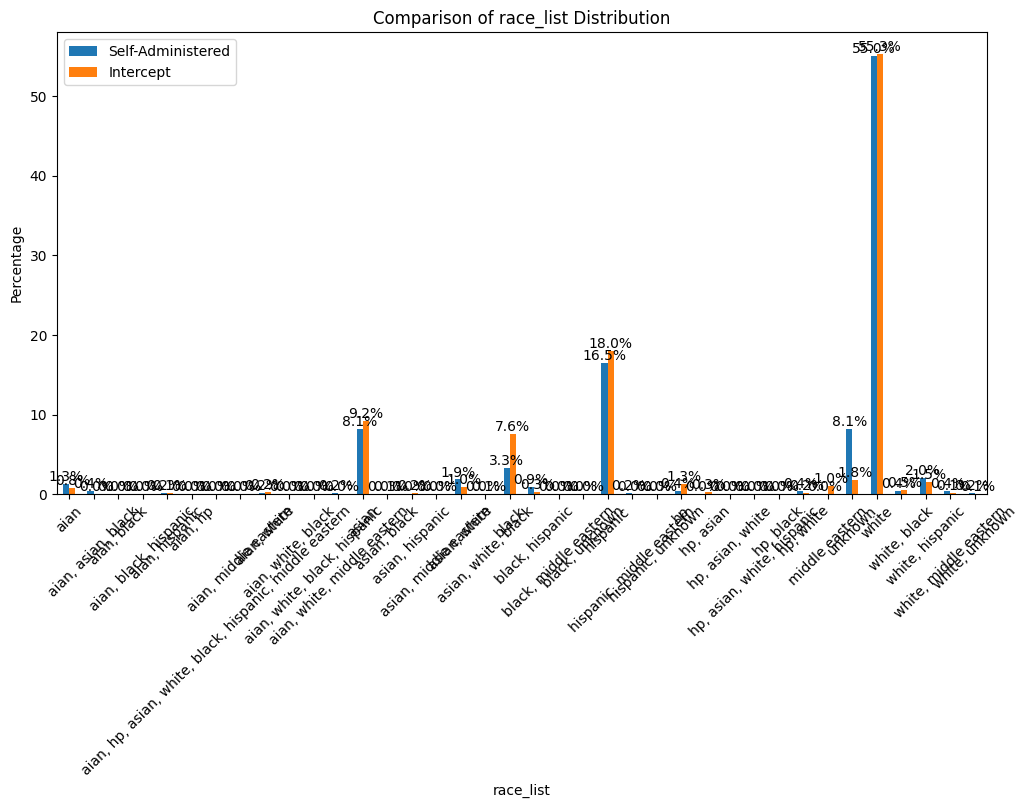

In [35]:
compare_distributions(sas_data, intercept_data, 'race_list')

<Figure size 1200x600 with 0 Axes>

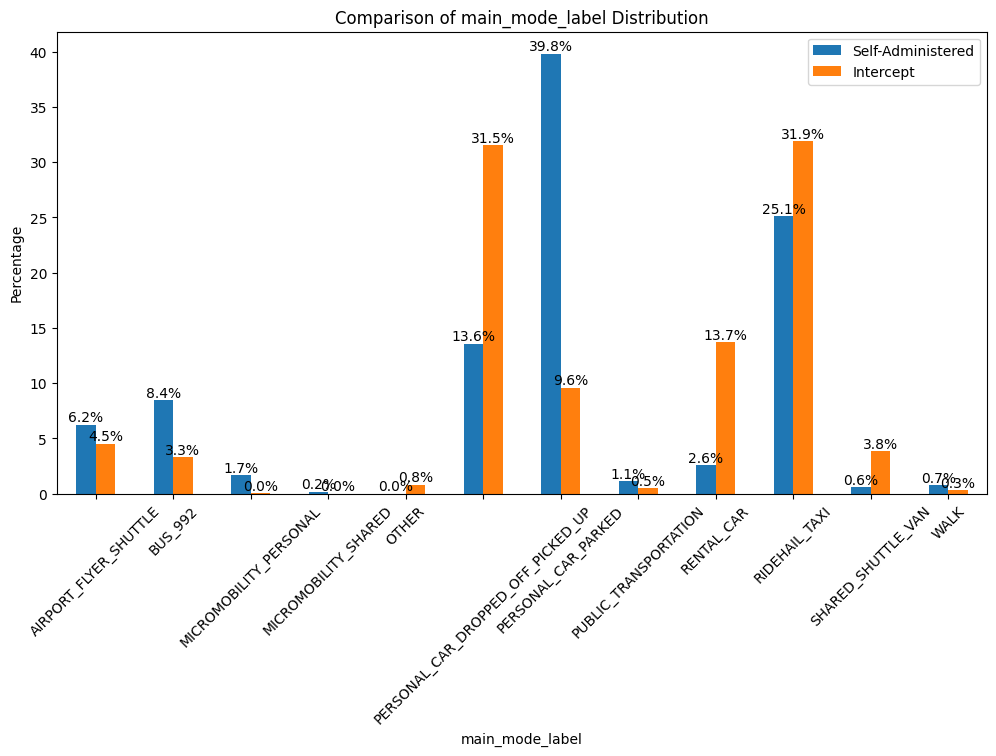

In [36]:
compare_distributions(sas_data, intercept_data, 'main_mode_label')

<Figure size 1200x600 with 0 Axes>

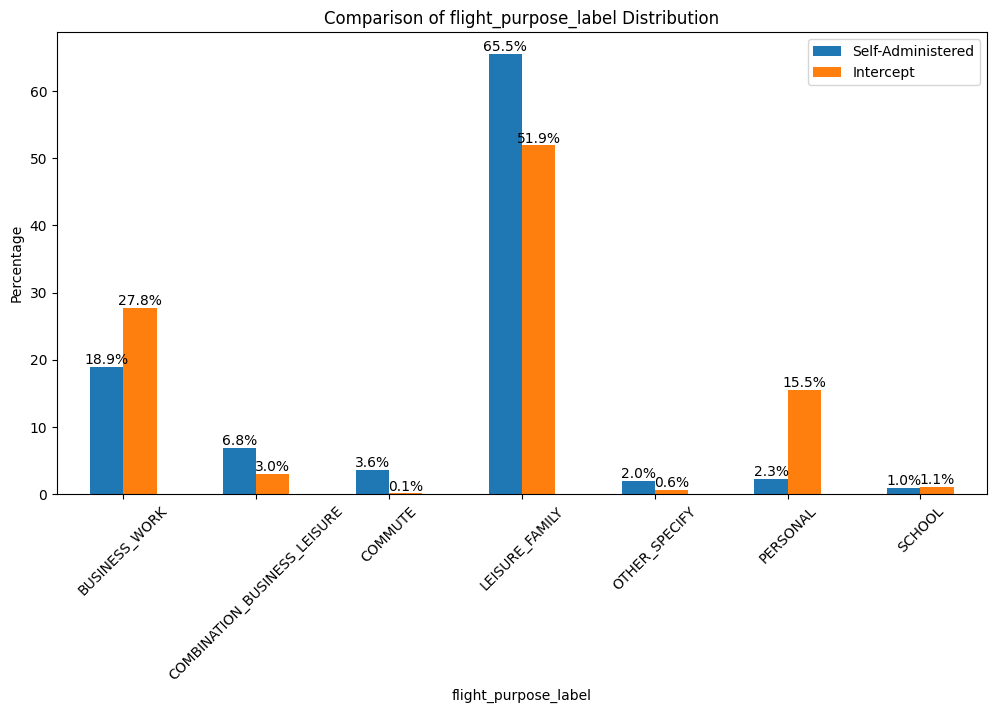

In [38]:
compare_distributions(sas_data, intercept_data, 'flight_purpose_label')

In [41]:
sas_data['date_completed'].value_counts().sort_index()

date_completed
2024-10-23    71
2024-10-24    51
2024-10-25    17
2024-10-26     9
2024-10-27    11
2024-10-28     9
2024-10-29    11
2024-10-30     4
2024-10-31     9
2024-11-01    10
2024-11-02     3
2024-11-03     6
2024-11-04    13
2024-11-05    21
2024-11-06    23
2024-11-07    64
2024-11-08    12
2024-11-09     6
2024-11-10     3
2024-11-11    10
2024-11-12    16
2024-11-13     7
2024-11-14    15
2024-11-15    22
2024-11-16    10
2024-11-17     5
2024-11-18     6
2024-11-19     5
2024-11-20    10
2024-11-21     5
2024-11-22     6
2024-11-23    14
2024-11-24     4
2024-11-25     8
2024-11-26    12
2024-11-27     5
2024-11-28     3
2024-11-29     4
2024-11-30    10
2024-12-01    11
2024-12-02     4
Name: count, dtype: int64